In [34]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [35]:
result_acc_ds1, result_acc_ds2 = [], []

In [65]:
import pickle 

# dataset 1 bệnh tim
with open('preprocessing/heart/X.pkl', 'rb') as f:
    X_train_test = pickle.load(f)
with open('preprocessing/heart/y.pkl', 'rb') as f:
    label = pickle.load(f)

print('So luong du lieu: ', len(X_train_test))
print('So luong nhan: ', len(label))
X_train_test.dtypes

So luong du lieu:  1025
So luong nhan:  1025


age          float64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
sex_0          uint8
sex_1          uint8
cp_0           uint8
cp_1           uint8
cp_2           uint8
cp_3           uint8
fbs_0          uint8
fbs_1          uint8
restecg_0      uint8
restecg_1      uint8
restecg_2      uint8
exang_0        uint8
exang_1        uint8
slope_0        uint8
slope_1        uint8
slope_2        uint8
ca_0           uint8
ca_1           uint8
ca_2           uint8
ca_3           uint8
ca_4           uint8
thal_0         uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

In [37]:
# Dataset 1 bệnh tim
X_train, X_test, y_train, y_test = train_test_split(X_train_test, label, test_size=0.15, stratify=label, random_state=10)
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
339,0.613800,-0.092055,0.135745,-0.222407,0.279688,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
469,1.385757,1.621431,0.775685,-1.787999,0.364832,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
472,0.393241,-0.092055,-0.950214,-0.787760,-0.401465,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
307,-1.150673,-0.663216,-0.504195,0.908298,-0.912329,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
783,0.172682,-0.663216,-0.116353,0.864809,-0.912329,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,1.275477,2.649522,-0.349058,0.690855,-0.060888,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
108,-1.591791,1.164502,-0.446019,1.386673,-0.912329,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
38,1.054918,-0.206287,0.329666,-1.918465,-0.742041,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
660,0.724079,0.364875,-1.551370,-1.048692,2.152857,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [38]:
# y_test.value_counts().plot(kind="pie")

In [39]:
class KNN:
    def __init__(self, top_k=5):
        self.top_k = top_k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    @staticmethod
    def distance(x1, x2):
        return np.linalg.norm(x1 - x2)

    def predict_batch(self, X):
        y_pred = [self.predict(x) for x in X]
        return y_pred

    def predict(self, x):
        # Compute distance to all points in train set
        distances = [self.distance(x, x_train) for x_train in self.X_train]
        # Sort the distance with index
        top_idx = np.argsort(distances)[:self.top_k]
        # Get top K label
        k_nearests = self.y_train[top_idx]
        # Predict the label
        label = Counter(k_nearests).most_common(1)[0][0]
        
        return label

In [40]:
def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

def plot_line(title, xlabel, X, Y, f1_Score, classes):
    plt.figure(figsize=(6, 4))
    f1_Score = list(zip(*f1_Score))
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    color = ['g', 'b', 'c', 'm']
    plt.plot(X, Y, linestyle='solid', marker='o', color = 'r', label=classes[0])
    for i in range(len(f1_Score)):
        plt.plot(X, f1_Score[i], linestyle='solid', marker='o', color = color[i], label=classes[i+1])
    plt.legend(loc='best')

100%|██████████| 6/6 [00:20<00:00,  3.36s/it]


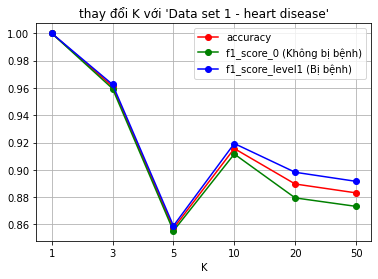

In [41]:
title = "thay đổi K với 'Data set 1 - heart disease'"

xlabel = "K"
X = []
Y = []
f1_Score = []
error = []

for k in tqdm([1, 3, 5, 10, 20, 50]):
    # Load model
    model = KNN(top_k = k)
    model.fit(np.array(X_train), np.array(y_train))

    # Sample predict model
    y_pred = model.predict_batch(np.array(X_test))

    # Caculate accuracy score
    acc = accuracy_score(y_pred, np.array(y_test))

    X.append(str(k))
    Y.append(acc)
    f1_Score.append(list(f1_score(y_test, y_pred, average=None)))
    
# Dataset 1
plot_line(title, xlabel, X, Y, f1_Score, ['accuracy', 'f1_score_0 (Không bị bệnh)', 
'f1_score_level1 (Bị bệnh)'])
plt.show()

In [42]:
max_accuracy = []

In [43]:
# Test mô hình với K=5, cho độ chính xác cao nhất
model = KNN(top_k = 1)

model.fit(np.array(X_train), np.array(y_train))

# Sample predict model
y_pred = model.predict_batch(np.array(X_test))

# Caculate accuracy score
acc = accuracy_score(y_pred, np.array(y_test))

max_accuracy.append(acc)
result_acc_ds1.append(acc)

acc

1.0

In [44]:
# Dataset 1
# X_train, X_test, y_train, y_test = train_test_split(X_.values, y_.values, test_size=0.15, stratify=y_.values, random_state=10)
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train_test, label, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

100%|██████████| 11/11 [00:07<00:00,  1.38it/s]


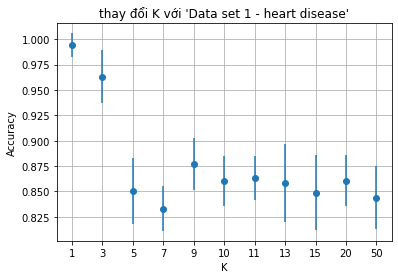

Accuracy max:  0.9941176470588236


In [45]:
title = "thay đổi K với 'Data set 1 - heart disease'"
xlabel = "K"
X = []
Y = []
error = []

for k in tqdm([1, 3, 5, 7, 9, 10,  11, 13, 15, 20, 50]):
    # Với từng giá trị k nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = KNeighborsClassifier(n_neighbors=k)
    # text_clf = SVC(C=k)
    mean, std = cross_validation(text_clf)
    X.append(str(k))
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
plt.show()
print('Accuracy max: ', max(Y))

KNN: 1.0


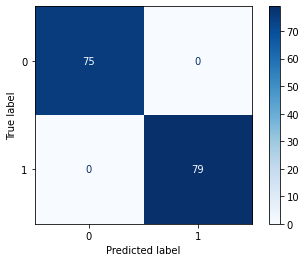

<Figure size 864x864 with 0 Axes>

In [46]:
# Test với bộ tham số tốt nhất
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print(f'KNN: {accuracy_score(y_test, knn.predict(X_test))}')

max_accuracy.append(accuracy_score(y_test, knn.predict(X_test)))
result_acc_ds1.append(accuracy_score(y_test, knn.predict(X_test)))

# Hiển thị confusion matrix
plot_confusion_matrix(knn, X_test, y_test, cmap = plt.cm.Blues)  
plt.figure(figsize = (12, 12))
plt.show()

In [47]:
# Generating classification report
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



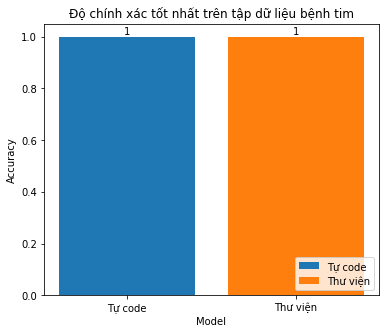

In [48]:
fig = plt.figure(figsize = (6, 5))
labels = ["Tự code", "Thư viện"]
# creating the bar plot
p1 = plt.bar(labels[0], max_accuracy[0])
p2 = plt.bar(labels[1], max_accuracy[1])

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Độ chính xác tốt nhất trên tập dữ liệu bệnh tim")
plt.bar_label(p1)
plt.bar_label(p2)
plt.xticks(np.arange(len(labels)), labels)
plt.legend(labels, loc ="lower right")
plt.show()

In [49]:
# dataset 2 bệnh xơ gan
with open('preprocessing/cirrhosis/X.pkl', 'br') as f:
    X_train_test = pickle.load(f)

with open('preprocessing/cirrhosis/y.pkl', 'rb') as f:
    label = pickle.load(f)

print('So luong du lieu: ', len(X_train_test))
print('So luong nhan: ', len(label))
X_train_test[0:5]

So luong du lieu:  412
So luong nhan:  412


,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,...,Drug_1,Ascites_0,Ascites_1,Hepatomegaly_0,Hepatomegaly_1,Spiders_0,Spiders_1,Edema_0,Edema_1,Edema_2
0,0.736012,2.547971,-0.547614,-2.125657,0.779134,-0.141082,0.312051,0.879630,-0.704207,1.432617,...,0,0,1,0,1,0,1,0,0,1
1,0.545297,-0.480933,-0.335883,1.511284,-0.578348,2.909990,-0.181213,-0.671780,-0.376028,-0.131446,...,0,1,0,0,1,0,1,1,0,0
2,1.880301,-0.413122,-0.986570,-0.047405,1.497801,-0.787113,-0.532939,-1.281263,-1.117076,1.237109,...,0,1,0,1,0,1,0,0,1,0
3,0.354582,-0.322707,-0.635405,-2.267356,-0.445261,2.225799,-1.249112,-0.597904,-0.778311,-0.424708,...,0,1,0,0,1,0,1,0,1,0
4,-1.171138,0.038953,-0.454659,0.070678,0.606122,-0.703806,-0.188684,-0.967287,-1.275872,0.161816,...,1,1,0,0,1,0,1,1,0,0


<AxesSubplot:ylabel='Stage'>

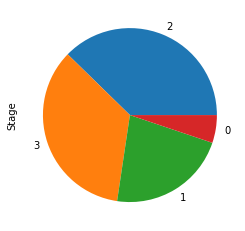

In [50]:
# Dataset 2
cv = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 0)
train_index, test_index = list(cv.split(X_train_test, label))[0]
X_train, X_test = X_train_test.iloc[train_index], X_train_test.iloc[test_index]
y_train, y_test = label.iloc[train_index], label.iloc[test_index]
y_train.value_counts().plot(kind="pie")

100%|██████████| 6/6 [00:04<00:00,  1.32it/s]


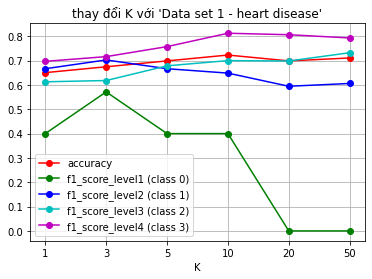

In [51]:
title = "thay đổi K với 'Data set 1 - heart disease'"

xlabel = "K"
X = []
Y = []
f1_Score = []
error = []

for k in tqdm([1, 3, 5, 10, 20, 50]):
    # Load model
    model = KNN(top_k = k)
    model.fit(np.array(X_train), np.array(y_train))

    # Sample predict model
    y_pred = model.predict_batch(np.array(X_test))

    # Caculate accuracy score
    acc = accuracy_score(y_pred, np.array(y_test))

    X.append(str(k))
    Y.append(acc)
    f1_Score.append(list(f1_score(y_test, y_pred, average=None)))
# Dataset 2
plot_line(title, xlabel, X, Y, f1_Score, ['accuracy', 'f1_score_level1 (class 0)', 
'f1_score_level2 (class 1)', 'f1_score_level3 (class 2)', 'f1_score_level4 (class 3)'])

In [52]:
max_accuracy = []

In [53]:
# Test mô hình với K=5, cho độ chính xác cao nhất
model = KNN(top_k = 10)

model.fit(np.array(X_train), np.array(y_train))

# Sample predict model
y_pred = model.predict_batch(np.array(X_test))

# Caculate accuracy score
acc = accuracy_score(y_pred, np.array(y_test))

max_accuracy.append(acc)
result_acc_ds2.append(acc)

acc

0.7228915662650602

In [54]:
# Dataset 2
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state = 0)
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train_test, label, cv=cv, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

100%|██████████| 11/11 [00:02<00:00,  4.87it/s]


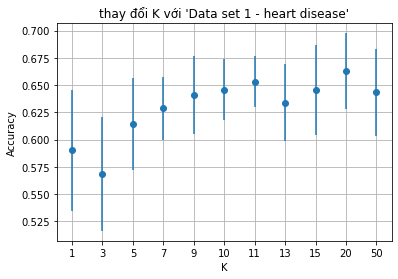

Accuracy max:  0.6626506024096386


In [55]:
title = "thay đổi K với 'Data set 1 - heart disease'"
xlabel = "K"
X = []
Y = []
error = []

for k in tqdm([1, 3, 5, 7, 9, 10,  11, 13, 15, 20, 50]):
    # Với từng giá trị k nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = KNeighborsClassifier(n_neighbors=k)
    # text_clf = SVC(C=k)
    mean, std = cross_validation(text_clf)
    X.append(str(k))
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
plt.show()
print('Accuracy max: ', max(Y))

KNN: 0.7108433734939759


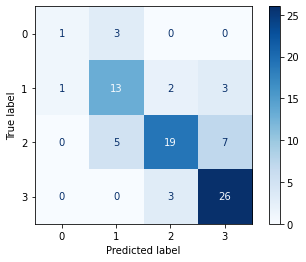

<Figure size 864x864 with 0 Axes>

In [56]:
# Test với bộ tham số tốt nhất
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print(f'KNN: {accuracy_score(y_test, knn.predict(X_test))}')

max_accuracy.append(accuracy_score(y_test, knn.predict(X_test)))
result_acc_ds2.append(accuracy_score(y_test, knn.predict(X_test)))

# Hiển thị confusion matrix
plot_confusion_matrix(knn, X_test, y_test, cmap = plt.cm.Blues)  
plt.figure(figsize = (12, 12))
plt.show()

In [57]:
# Generating classification report
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.62      0.68      0.65        19
           2       0.79      0.61      0.69        31
           3       0.72      0.90      0.80        29

    accuracy                           0.71        83
   macro avg       0.66      0.61      0.62        83
weighted avg       0.71      0.71      0.70        83



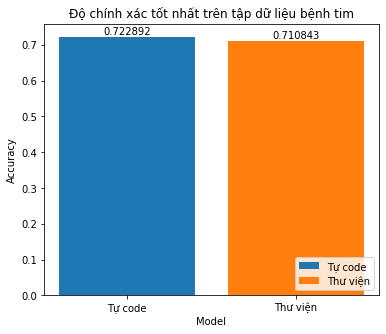

In [58]:
fig = plt.figure(figsize = (6, 5))
labels = ["Tự code", "Thư viện"]
# creating the bar plot
p1 = plt.bar(labels[0], max_accuracy[0])
p2 = plt.bar(labels[1], max_accuracy[1])

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Độ chính xác tốt nhất trên tập dữ liệu bệnh tim")
plt.bar_label(p1)
plt.bar_label(p2)
plt.xticks(np.arange(len(labels)), labels)
plt.legend(labels, loc ="lower right")
plt.show()

In [59]:
# result_acc_ds2.reverse()
print([result_acc_ds1, result_acc_ds2])

[[1.0, 1.0], [0.7228915662650602, 0.7108433734939759]]


In [63]:
x, y = result_acc_ds1, result_acc_ds2
y.reverse()
print(y)

[0.7108433734939759, 0.7228915662650602]


In [64]:
import pickle

with open('result/KNN.pkl', 'wb') as f:
    pickle.dump([result_acc_ds1, result_acc_ds2], f)
